# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print ('Test')

Test


## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [2]:
#your code here
def ReadCsv(filename):
    import pandas as pd
    try:
        Salary=pd.read_csv(filename)
    except KeyError:
        print ('ERROR: Did not find %s in zip file' % filename)
    else:
        print ('Good!' )#% (info.filename, info.file_size)
    return Salary


In [3]:
url= 'http://seanlahman.com/files/database/baseballdatabank-master_2016-03-02.zip'

import requests, zipfile, StringIO
r = requests.get(url, stream=True)
z = zipfile.ZipFile(StringIO.StringIO(r.content))

z.printdir()

filename='baseballdatabank-master/core/Salaries.csv'
Salary=ReadCsv(filename)
Teams=ReadCsv('baseballdatabank-master/core/Teams.csv' )

print (Salary.head(10))
print (Teams.head(10))

File Name                                             Modified             Size
baseballdatabank-master/                       2016-03-02 00:44:42            0
baseballdatabank-master/README.txt             2016-03-02 00:44:42          878
baseballdatabank-master/core/                  2016-03-02 00:44:42            0
baseballdatabank-master/core/AllstarFull.csv   2016-03-02 00:44:42       208224
baseballdatabank-master/core/Appearances.csv   2016-03-02 00:44:42      5989686
baseballdatabank-master/core/AwardsManagers.csv 2016-03-02 00:44:42         8104
baseballdatabank-master/core/AwardsPlayers.csv 2016-03-02 00:44:42       246769
baseballdatabank-master/core/AwardsShareManagers.csv 2016-03-02 00:44:42        18188
baseballdatabank-master/core/AwardsSharePlayers.csv 2016-03-02 00:44:42       229613
baseballdatabank-master/core/Batting.csv       2016-03-02 00:44:42      6247523
baseballdatabank-master/core/BattingPost.csv   2016-03-02 00:44:42       716496
baseballdatabank-master/core

In [4]:
print Salary.head(10)

   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000
5    1985    ATL   NL  chambch01  800000
6    1985    ATL   NL  dedmoje01  150000
7    1985    ATL   NL  forstte01  483333
8    1985    ATL   NL  garbege01  772000
9    1985    ATL   NL  harpete01  250000


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [6]:
#your code here
TeamSalary = Salary.pivot_table(values='salary', index='yearID' ,columns='teamID', aggfunc=np.sum)

print TeamSalary.head(10)

teamID  ANA  ARI         ATL         BAL         BOS         CAL         CHA  \
yearID                                                                         
1985    NaN  NaN  14807000.0  11560712.0  10897560.0  14427894.0   9846178.0   
1986    NaN  NaN  17102786.0  13001258.0  14402239.0  14427258.0  10418819.0   
1987    NaN  NaN  16544560.0  13900273.0  10144167.0  12843499.0  10641843.0   
1988    NaN  NaN  12728174.0  13532075.0  13896092.0  11947388.0   6390000.0   
1989    NaN  NaN  11112334.0   8275167.0  17481748.0  15097833.0   7265410.0   
1990    NaN  NaN  14555501.0   9680084.0  20558333.0  21720000.0   9491500.0   
1991    NaN  NaN  18403500.0  17519000.0  35167500.0  33060001.0  16919667.0   
1992    NaN  NaN  34625333.0  23780667.0  43610584.0  34749334.0  30160833.0   
1993    NaN  NaN  41641417.0  29096500.0  37120583.0  28588334.0  39696166.0   
1994    NaN  NaN  49383513.0  38849769.0  37859084.0  25156218.0  39183836.0   

teamID         CHN         CIN         

#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [7]:
#your code here
temp=Teams[['yearID','teamID','W']]
temp1= TeamSalary.unstack().reset_index(name='value')   
TeamSalaryMerged= pd.merge(temp1, temp, how='left', on=['yearID','teamID'] )
TeamSalaryMerged=TeamSalaryMerged.rename(columns={'value':'TeamSalary'})
print TeamSalaryMerged.head(100)

   teamID  yearID   TeamSalary      W
0     ANA    1985          NaN    NaN
1     ANA    1986          NaN    NaN
2     ANA    1987          NaN    NaN
3     ANA    1988          NaN    NaN
4     ANA    1989          NaN    NaN
5     ANA    1990          NaN    NaN
6     ANA    1991          NaN    NaN
7     ANA    1992          NaN    NaN
8     ANA    1993          NaN    NaN
9     ANA    1994          NaN    NaN
10    ANA    1995          NaN    NaN
11    ANA    1996          NaN    NaN
12    ANA    1997   31135472.0   84.0
13    ANA    1998   41281000.0   85.0
14    ANA    1999   55388166.0   70.0
15    ANA    2000   51464167.0   82.0
16    ANA    2001   47535167.0   75.0
17    ANA    2002   61721667.0   99.0
18    ANA    2003   79031667.0   77.0
19    ANA    2004  100534667.0   92.0
20    ANA    2005          NaN    NaN
21    ANA    2006          NaN    NaN
22    ANA    2007          NaN    NaN
23    ANA    2008          NaN    NaN
24    ANA    2009          NaN    NaN
25    ANA   

#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

C:\Anaconda2\envs\arc1041\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


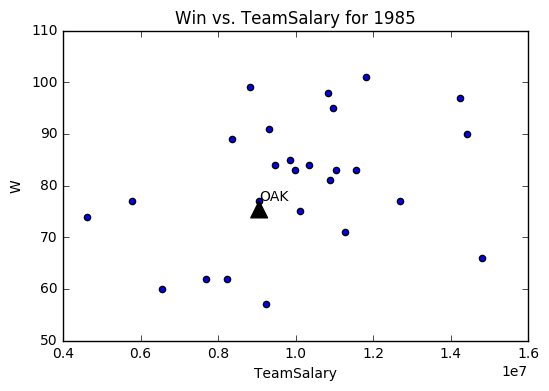

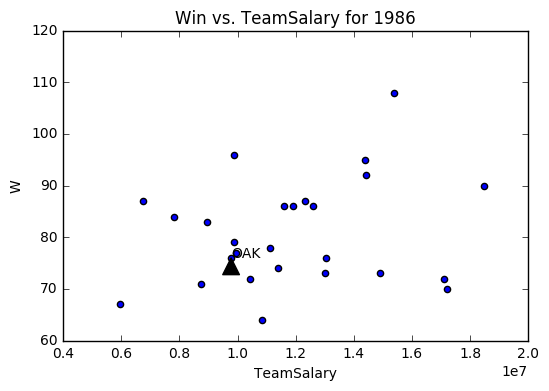

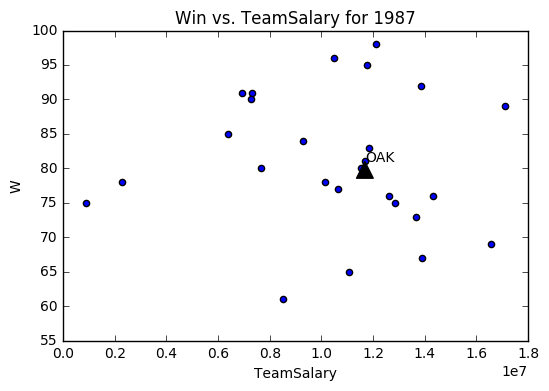

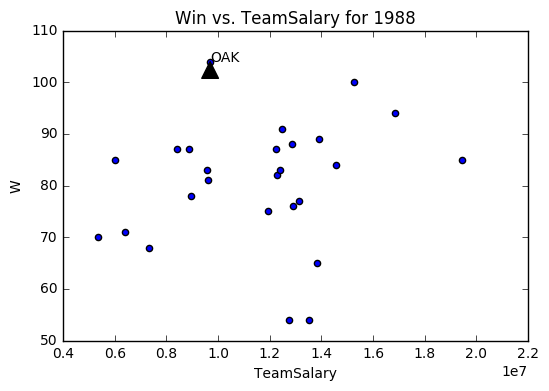

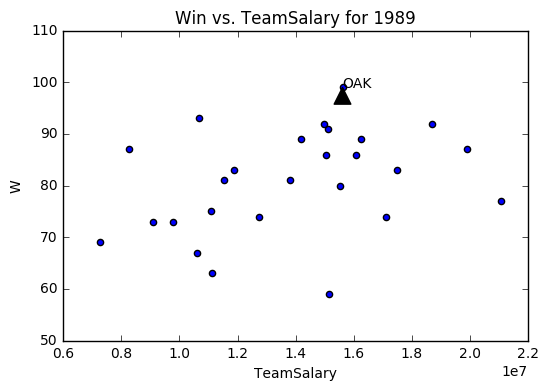

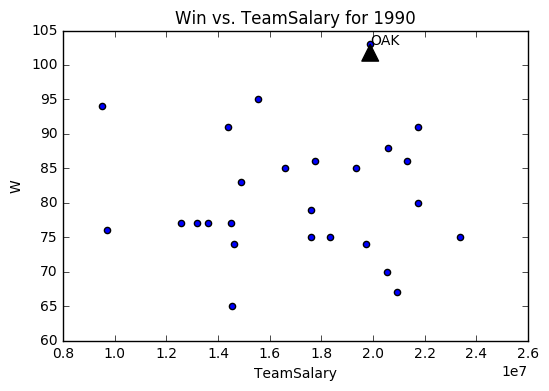

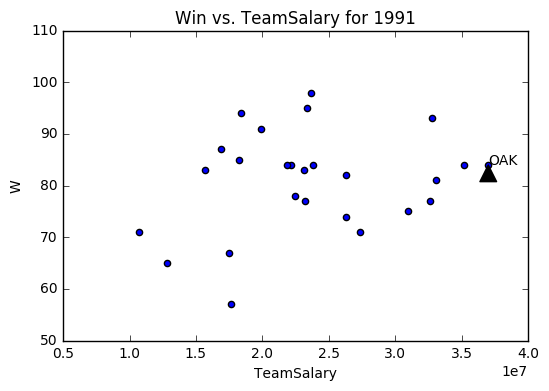

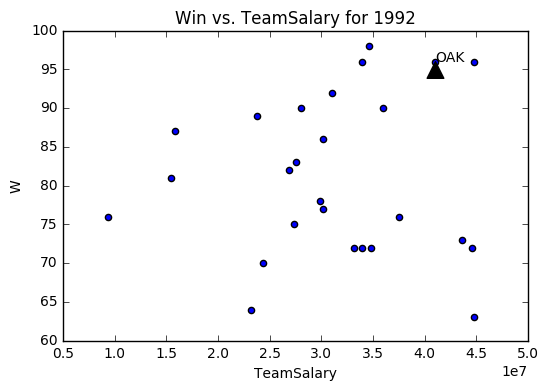

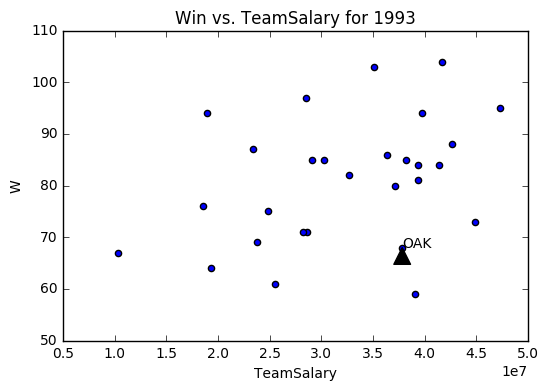

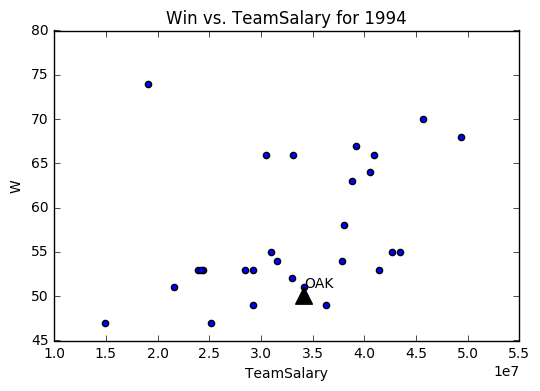

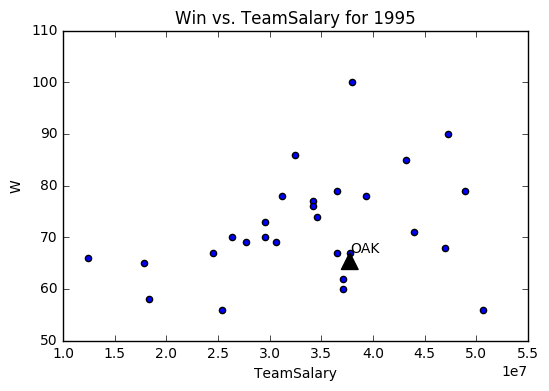

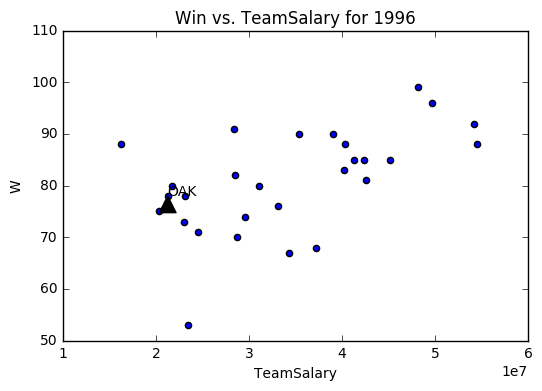

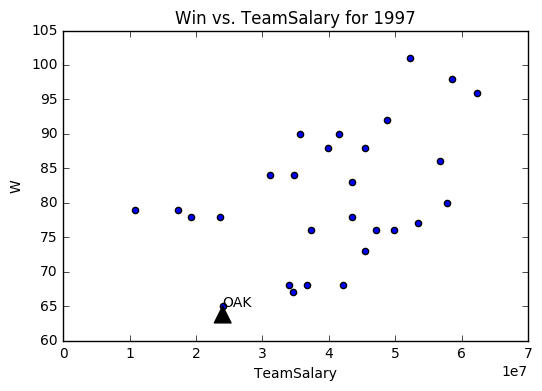

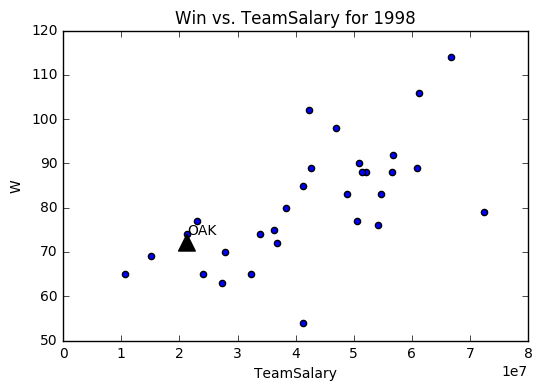

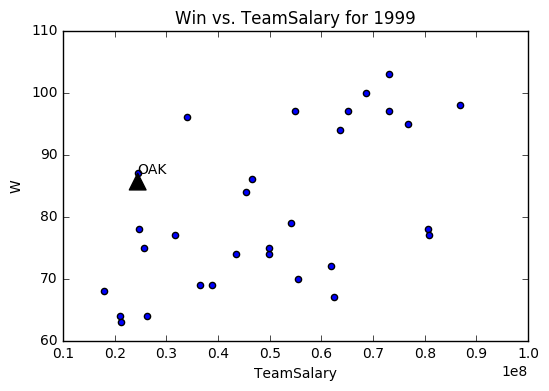

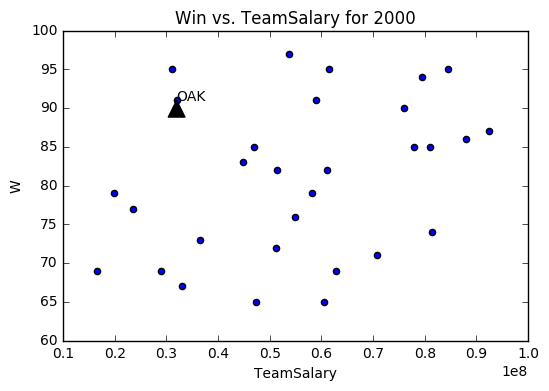

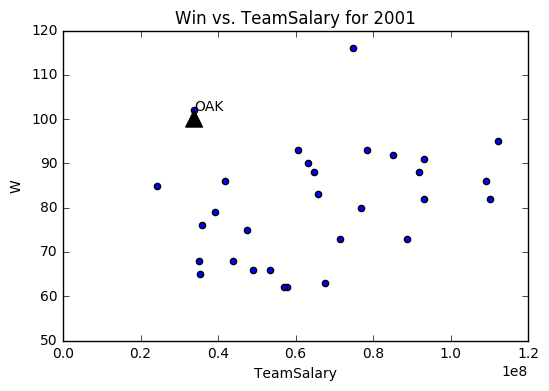

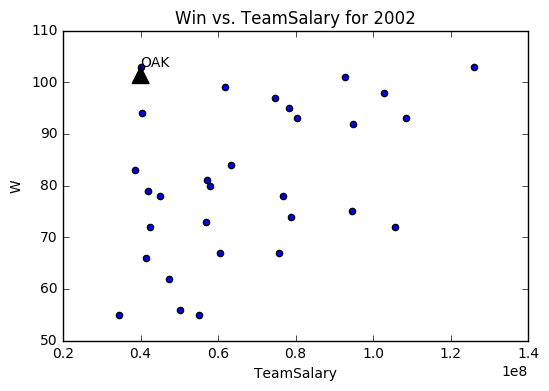

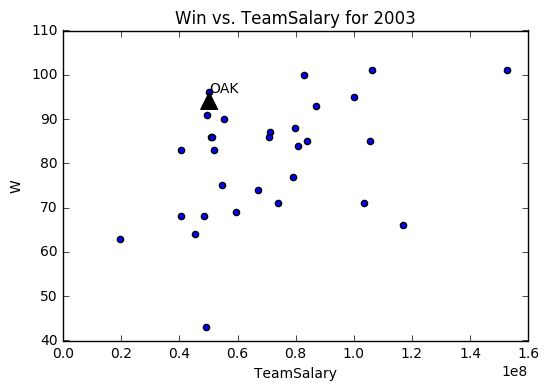

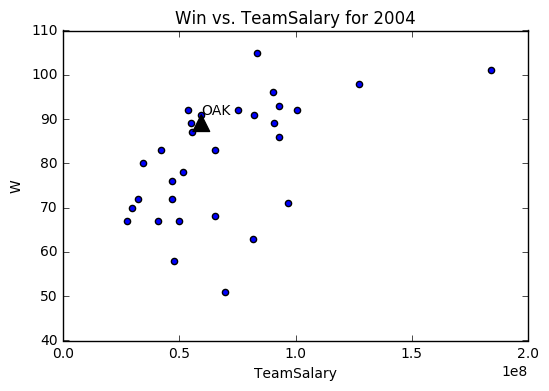

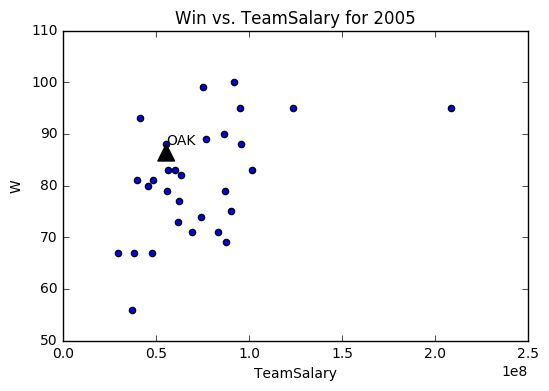

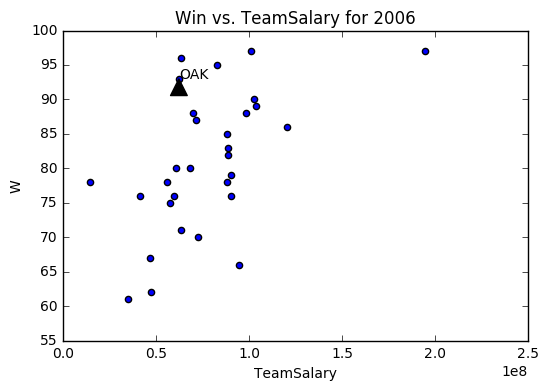

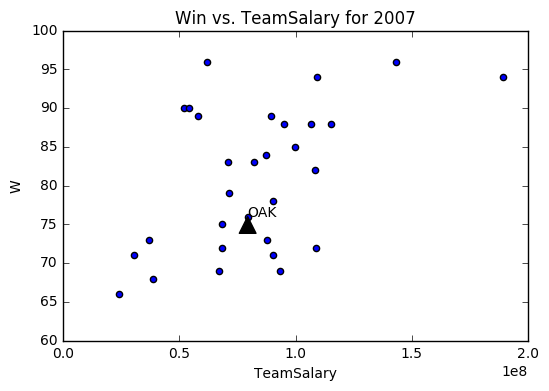

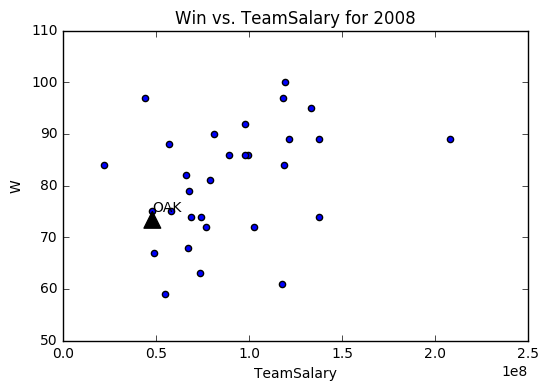

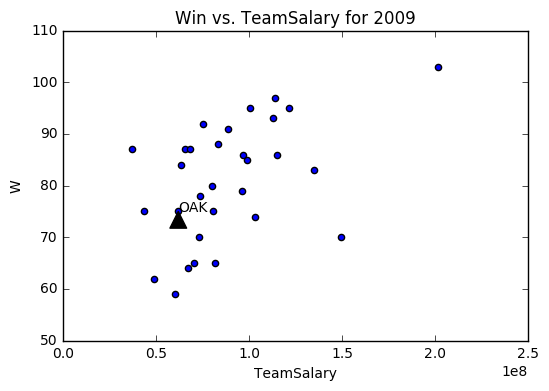

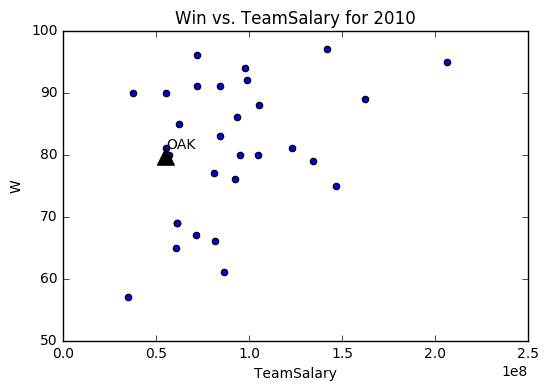

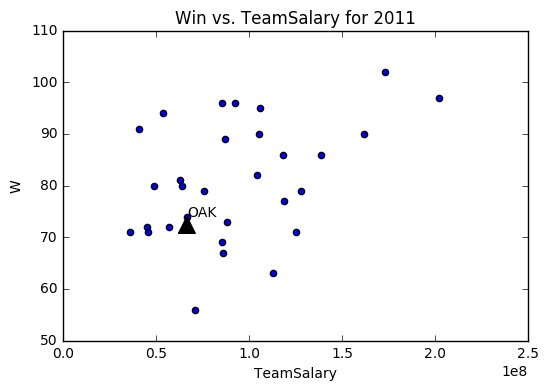

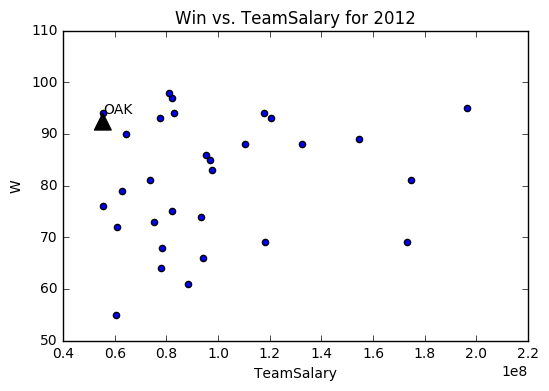

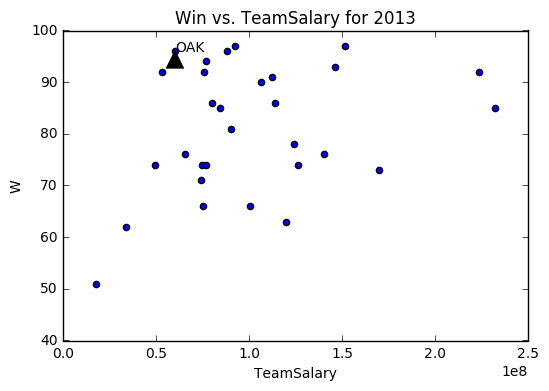

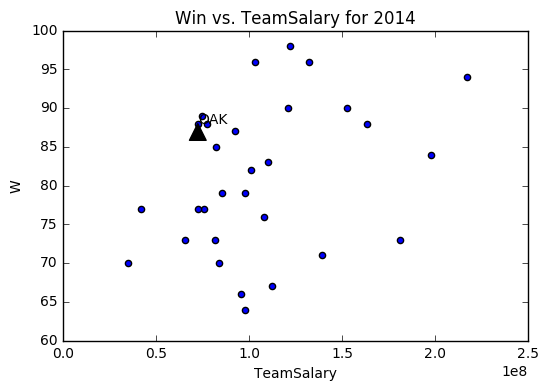

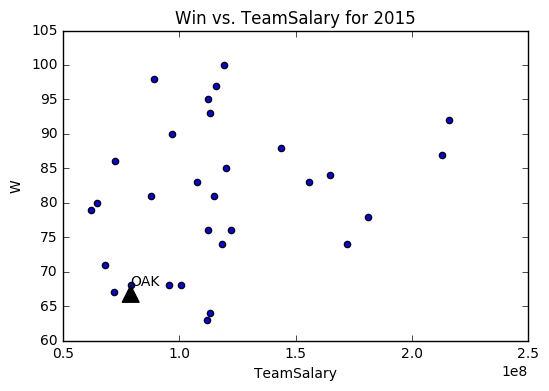

In [8]:
#your code here
yearArray= TeamSalaryMerged['yearID'].unique()
TeamSalaryMerged[TeamSalaryMerged.yearID == 1985]

for year in yearArray:
    
 temp= TeamSalaryMerged[TeamSalaryMerged.yearID == year]
 line=temp[temp.teamID =='OAK']
 ax=temp.plot(kind='scatter',x= 'TeamSalary',y='W', title= 'Win vs. TeamSalary for ' +str(year))
 ax.annotate('OAK',
            xy=(line.TeamSalary, line.W),  
            arrowprops=dict(facecolor='black', shrink=0.05))

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [12]:
#your code here
from sklearn import linear_model


# Create linear regression object
regr = linear_model.LinearRegression()
k=0
MSE_years=[]
for year in yearArray:
  temp= TeamSalaryMerged[TeamSalaryMerged.yearID == year]  
  # Train the model using the training sets
  temp1= temp[temp.TeamSalary.notnull()]
  temp2=temp1[temp1.W.notnull()]

  regr.fit(temp2.TeamSalary.values.reshape(-1, 1), temp2.W.values.reshape(-1, 1))   ##### use one row data only
  print year
  # The coefficients
  print('Coefficients: \n', regr.coef_)
  # The mean squared error
  MSE=np.mean((regr.predict(temp2.TeamSalary.values.reshape(-1, 1))- temp2.W.values.reshape(-1, 1)) ** 2)
  print("Mean squared error: %.2f" % MSE)
  MSE_years.append(MSE)


1985
('Coefficients: \n', array([[  1.74056868e-06]]))
Mean squared error: 134.22
1986
('Coefficients: \n', array([[  6.77570086e-07]]))
Mean squared error: 96.88
1987
('Coefficients: \n', array([[ -1.43708177e-07]]))
Mean squared error: 92.90
1988
('Coefficients: \n', array([[  5.76385124e-07]]))
Mean squared error: 135.47
1989
('Coefficients: \n', array([[  9.53144305e-07]]))
Mean squared error: 84.82
1990
('Coefficients: \n', array([[  3.98914777e-09]]))
Mean squared error: 79.11
1991
('Coefficients: \n', array([[  3.28831164e-07]]))
Mean squared error: 85.74
1992
('Coefficients: \n', array([[  3.64924796e-08]]))
Mean squared error: 100.28
1993
('Coefficients: \n', array([[  4.64205372e-07]]))
Mean squared error: 124.72
1994
('Coefficients: \n', array([[  3.55130125e-07]]))
Mean squared error: 46.82
1995
('Coefficients: \n', array([[  3.54812536e-07]]))
Mean squared error: 90.74
1996
('Coefficients: \n', array([[  5.14158593e-07]]))
Mean squared error: 67.16
1997
('Coefficients: \n'

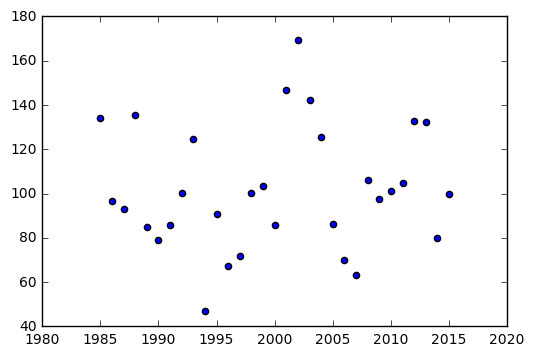

In [14]:
plt.scatter(yearArray,MSE_years)

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [6]:
#your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pylab import *

In [16]:
url='https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv'

Countries=pd.read_csv(url)




Area  Abkhazia  Afghanistan  Akrotiri and Dhekelia  Albania  Algeria  \
Year                                                                   
1270       NaN          NaN                    NaN      NaN      NaN   
1271       NaN          NaN                    NaN      NaN      NaN   
1272       NaN          NaN                    NaN      NaN      NaN   
1273       NaN          NaN                    NaN      NaN      NaN   
1274       NaN          NaN                    NaN      NaN      NaN   

Area  American Samoa  Andorra  Angola  Anguilla  Antigua and Barbuda  ...    \
Year                                                                  ...     
1270             NaN      NaN     NaN       NaN                  NaN  ...     
1271             NaN      NaN     NaN       NaN                  NaN  ...     
1272             NaN      NaN     NaN       NaN                  NaN  ...     
1273             NaN      NaN     NaN       NaN                  NaN  ...     
1274             NaN 

Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [7]:
#your code here
from io import StringIO
import pandas as pd
import requests
import urllib2
##url='https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv'
##s=requests.get(url).text
##c=pd.read_csv(StringIO(s))

url="https://www.gapminder.org/documentation/documentation/gapdata001%20v14.xlsx"
hdr = {'User-Agent': 'Mozilla/5.0'}
xld = urllib2.Request(url,headers=hdr)
page = urllib2.urlopen(xld)
PageExcelFile=pd.ExcelFile(page)

income=PageExcelFile.parse('Data & metadata')

#print income.head(20)



Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [8]:
#your code here
income_pivot=income.pivot_table(values='GDP per capita - with interpolations', index='Year' ,columns='Area')

print income_pivot.head()

#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

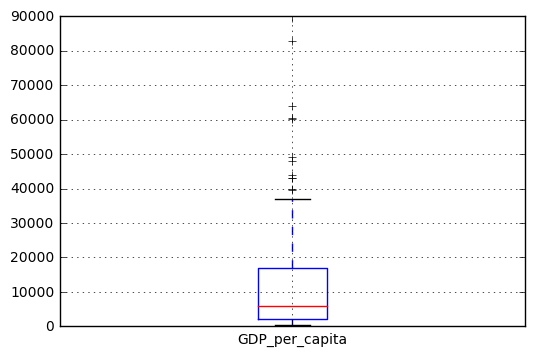

In [17]:
#your code here
temp= income[income.Year==2000]
temp=temp.rename(columns={'GDP per capita - with interpolations':'GDP_per_capita'})
ax=temp.boxplot("GDP_per_capita")

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [18]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here
def MergeByYear(income, Countries,year):
    import pandas as pd
    temp=income[income.Year==year]
    temp=temp.rename(columns={'GDP per capita - with interpolations':'GDP_per_capita'})
    
    temp1=temp[['Area','Year','GDP_per_capita']]
    #print temp1.head()
    MergeByYear=temp1.merge(Countries, left_on='Area', right_on='Country')
    return MergeByYear

incomeMerged=MergeByYear(income, Countries,2010)
print incomeMerged

                       Area  Year  GDP_per_capita                 Country  \
0               Afghanistan  2010     1214.613653             Afghanistan   
1                   Albania  2010     6746.445312                 Albania   
2                   Algeria  2010     6300.648214                 Algeria   
3                   Andorra  2010    33052.282318                 Andorra   
4                    Angola  2010     5497.618103                  Angola   
5       Antigua and Barbuda  2010    13921.516220     Antigua and Barbuda   
6                 Argentina  2010    14486.636604               Argentina   
7                   Armenia  2010     4598.933383                 Armenia   
8                 Australia  2010    34884.763757               Australia   
9                   Austria  2010    35816.336594                 Austria   
10               Azerbaijan  2010     9325.554448              Azerbaijan   
11                  Bahamas  2010    21022.706461                 Bahamas   

#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

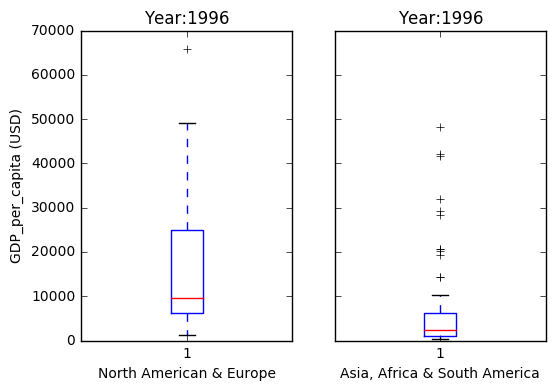

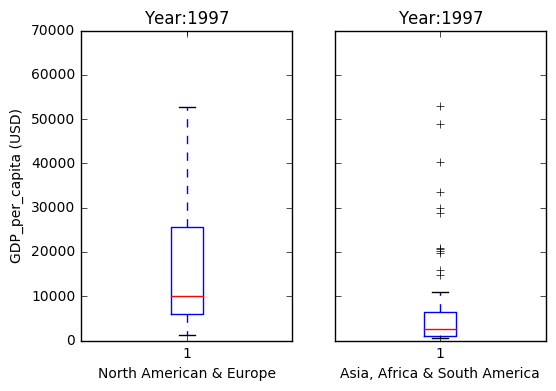

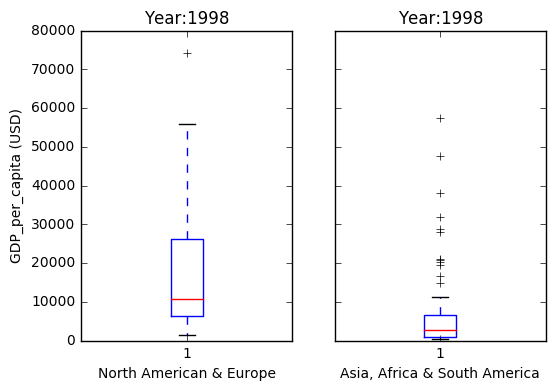

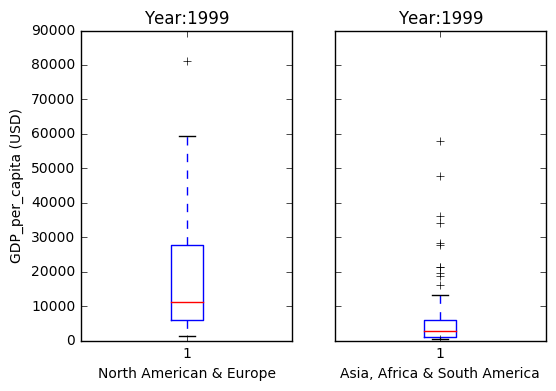

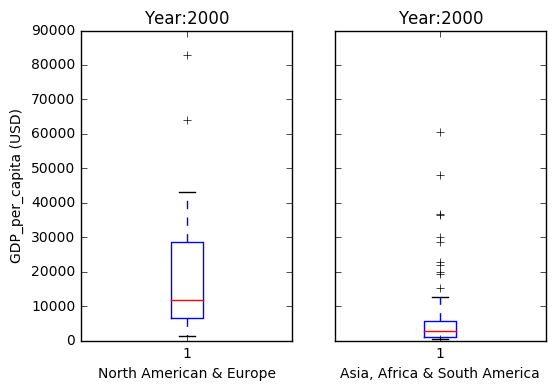

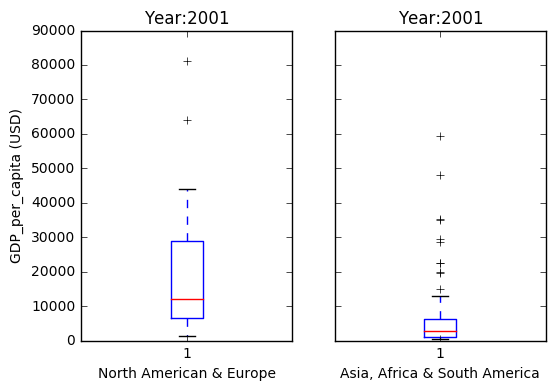

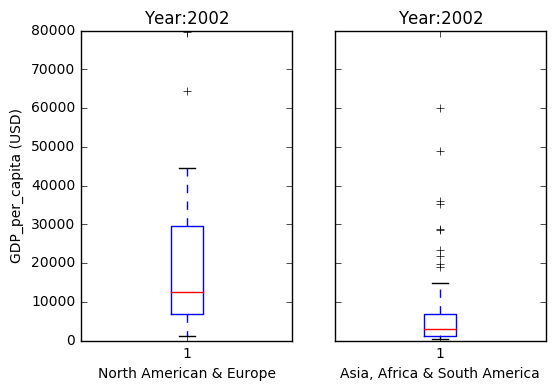

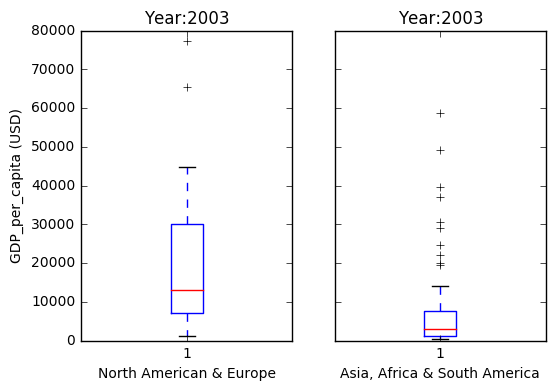

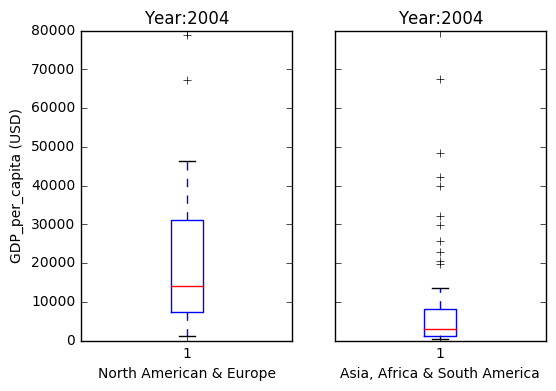

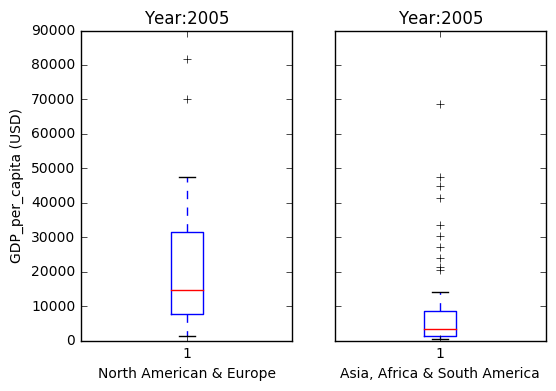

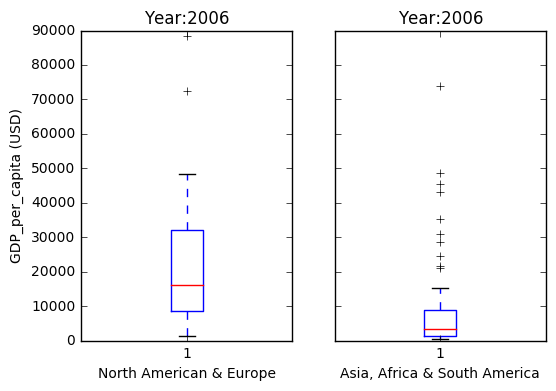

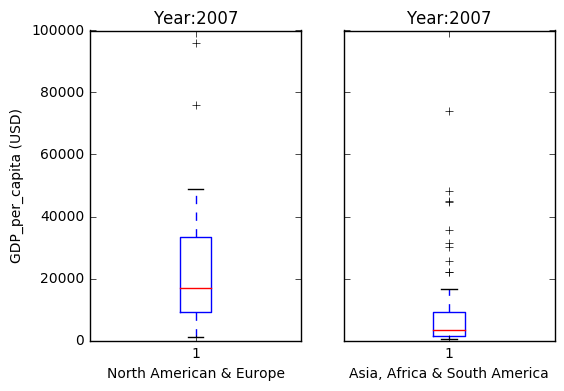

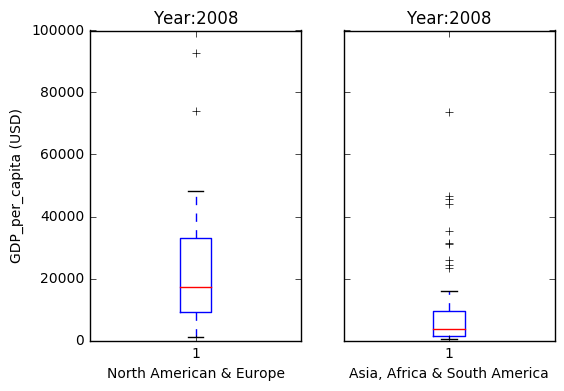

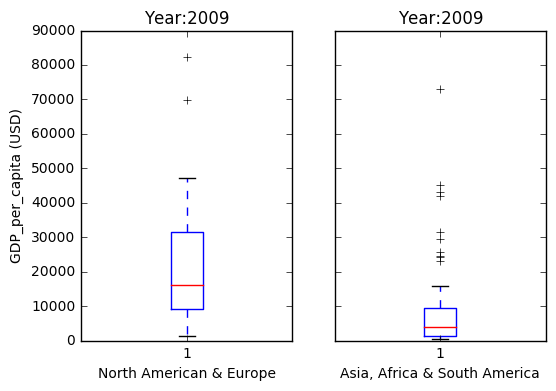

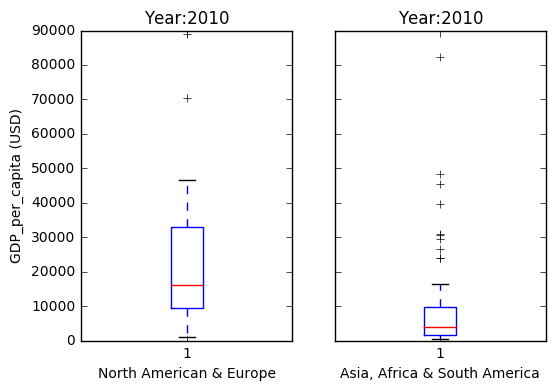

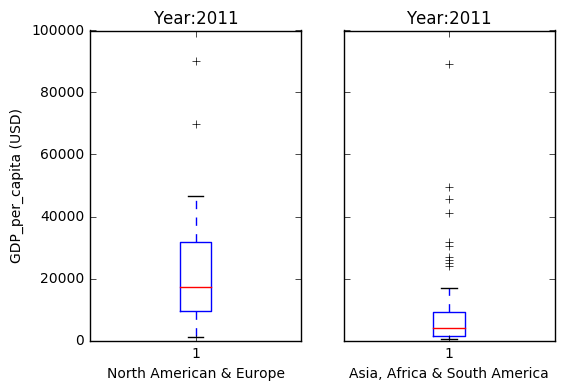

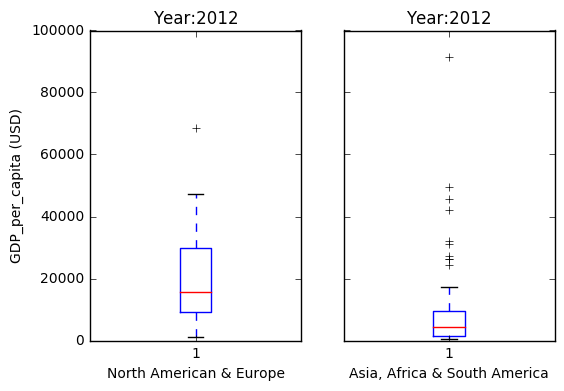

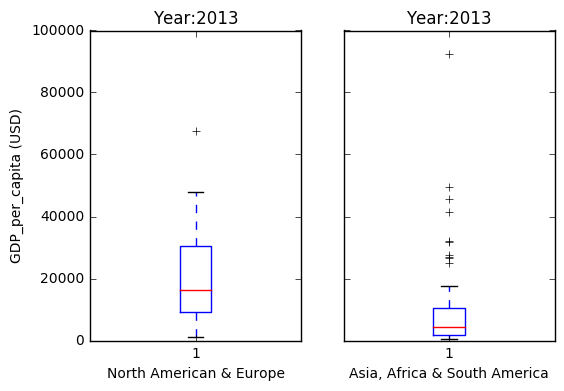

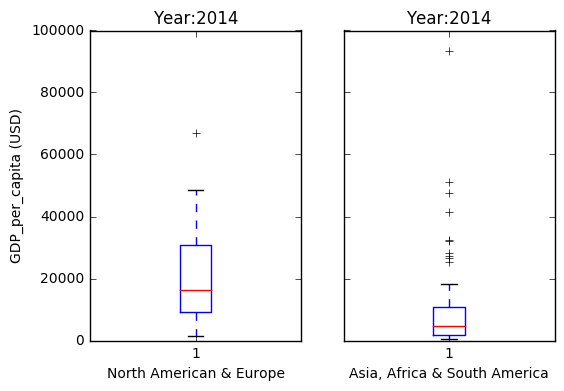

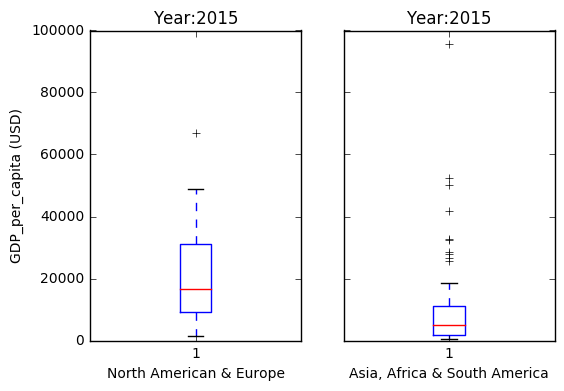

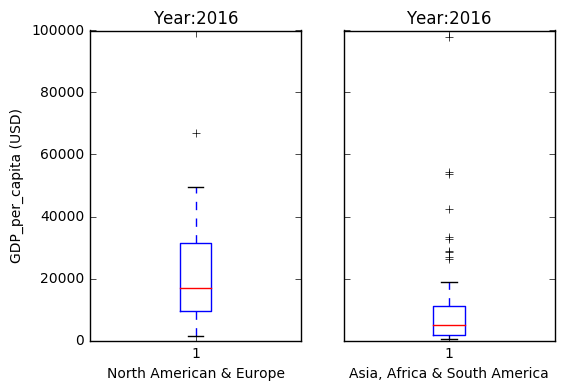

In [19]:
#your code here
for i in range (1996,2017) :
  incomeMerged=MergeByYear(income, Countries,i)
  
  RegionNAEU= incomeMerged[(incomeMerged.Region=="NORTH AMERICA" ) | (incomeMerged.Region=="EUROPE")  ]
  RegionTW= incomeMerged[(incomeMerged.Region=="ASIA") | (incomeMerged.Region=="AFRICA") \
                     | (incomeMerged.Region=="SOUTH AMERICA")]
#########RegionTW=pd.DataFrame(incomeMerged,incomeMerged.Region==["ASIA","AFRICA","SOUTH AMERICA"])
  temp1=RegionNAEU[~np.isnan(RegionNAEU.GDP_per_capita)]
  temp2=RegionTW[~np.isnan(RegionTW.GDP_per_capita)]

  #plt.close('all')
  # Two subplots, unpack the axes array immediately
  f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
  ax1.boxplot(temp1.GDP_per_capita.values.reshape(-1, 1))
  ax1.set_title('Year:' + str(i))
  ax1.set_xlabel('North American & Europe')
  ax2.boxplot(temp2.GDP_per_capita.values.reshape(-1, 1))
  ax2.set_xlabel('Asia, Africa & South America')
  ax1.set_ylabel('GDP_per_capita (USD)')
  ax2.set_title('Year:' + str(i))
  plt.show()

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [20]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here
def DifferenceRatio(diff, a):
      import scipy.stats as sta
      n=100000
      y=sta.norm.rvs(0,1,n)
      x=sta.norm.rvs(diff,1,n)

      PerX=sta.norm.sf(a,diff,1)
      PerY=sta.norm.sf(a,0,1)
      #print PerX, PerY
      DifferenceRatio=PerX/PerY

      return DifferenceRatio

    
      

print DifferenceRatio(0.1,0)

for a in range(2,6):
     Per=DifferenceRatio(1,a)
     print Per

1.07965567455
6.97381686809
16.853222551
42.6222008832
110.486893986


In [13]:
#your code here

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [21]:
#your code here
i=2012
incomeMerged=MergeByYear(income, Countries,i)
RegionSA= incomeMerged[(incomeMerged.Region=="SOUTH AMERICA" )]
RegionAsia= incomeMerged[(incomeMerged.Region=="ASIA" )]
print RegionSA.describe()
print RegionAsia.describe()



         Year  GDP_per_capita
count    12.0       12.000000
mean   2012.0     9471.469849
std       0.0     4007.770843
min    2012.0     4265.106449
25%    2012.0     7044.110834
50%    2012.0     9128.688126
75%    2012.0    12058.690666
max    2012.0    15714.103181
         Year  GDP_per_capita
count    38.0       38.000000
mean   2012.0    14510.041383
std       0.0    18486.013526
min    2012.0     1264.492645
25%    2012.0     3145.242371
50%    2012.0     6088.665281
75%    2012.0    21905.225162
max    2012.0    91492.645269
0.416666666667
0.368421052632


#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [15]:
#your code here
PerSA=float(len( RegionSA[RegionSA.GDP_per_capita>10000].GDP_per_capita))/len( RegionSA.GDP_per_capita)
print PerSA

PerAsia=float(len( RegionAsia[RegionAsia.GDP_per_capita>10000].GDP_per_capita))/len( RegionAsia.GDP_per_capita)
print PerAsia

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

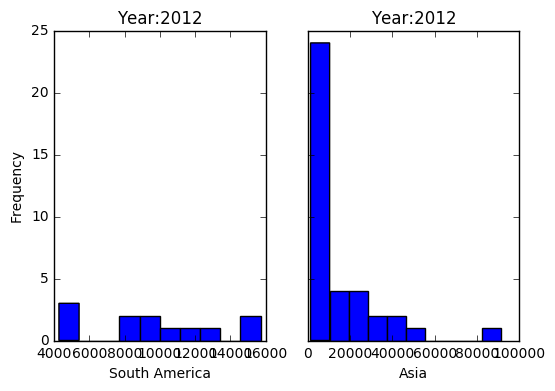

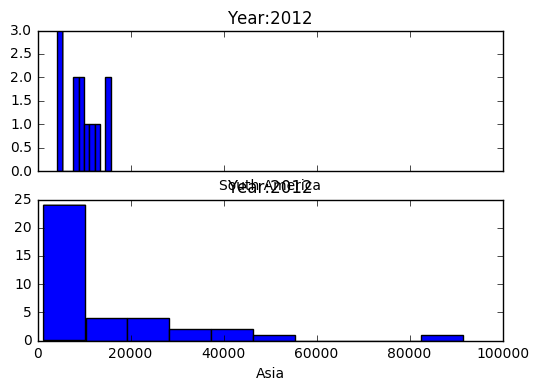

In [22]:
#your code here
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(RegionSA.GDP_per_capita.values.reshape(-1, 1))
ax1.set_title('Year:' + str(i))
ax1.set_xlabel('South America')
ax2.hist(RegionAsia.GDP_per_capita.values.reshape(-1, 1))
ax2.set_xlabel('Asia')
ax1.set_ylabel('Frequency')
ax2.set_title('Year:' + str(i))
plt.show()


f, axarr = plt.subplots(2, sharex=True)
axarr[0].hist(RegionSA.GDP_per_capita.values.reshape(-1, 1))
axarr[0].set_title('Year:' + str(i))
axarr[0].set_xlabel('South America')
axarr[1].set_title('Year:' + str(i))
axarr[1].hist(RegionAsia.GDP_per_capita.values.reshape(-1, 1))
axarr[1].set_xlabel('Asia')

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
